# 特征工程（二分类数据）

## 1. 课题    
特征工程实践操作    
    
## 2. 课前准备    
2.1 学员已完成数据预处理实践课程，掌握缺失值处理、重复值处理、数据离散化等常用数据预处理操作。       
2.2 准备好用于实践的数据集（本次使用数据预处理实践课程得到的已清洗数据）。
    
## 3. 教学目标    
3.1 熟练掌握特征处理、特征选择的基本流程和方法。      
3.2 学会根据实际需求选择合适的特征处理方法。    
3.3 能够分析和解决特征处理过程中出现的问题。      
    
## 4. 教学重点    
4.1 特征编码：将文本类型数据通过编码变为分类型或数值型数据。       
4.2 特征变换：将原始特征进行转换，如标准化、归一化、离散化等，以增强数据的可学习性。    
4.3 特征选择：通过业务知识和相关性、特征重要性等统计数据，筛选出相关性最大的特征集合。    
    
## 5. 教学难点    
5.1 根据实际需求选择合适的特征处理方法。    
5.2 特征处理过程中对不符合预期的结果如何进一步处理。    
5.3 如何避免漏掉非线性相关特征。

## 实施步骤    
### 步骤 1: 启动Jupyter Notebook    
+ 在搜索栏输入"cmd"命令，启动命令提示符窗口。    
+ 输入"jupyter notebook"命令，并按回车键启动Jupyter Notebook。   
    
### 步骤 2: 创建新的Notebook    
+ 在Jupyter的Web界面中，点击右上角的 "New" 按钮。    
+ 选择 "Python 3"内核来创建一个新的Python 3 Notebook。    
    
### 步骤 3: 导入必要的库
+ 我们通常使用numpy和pandas库来进行数据清洗，使用sklearn库来进行数据的分类、离散化等特征处理和特征选择，使用matplotlib和seaborn来进行数据的可视化。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# 定义字体，在图表中正常显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']
# 在图表中正常显示负号
plt.rcParams['axes.unicode_minus'] = False

### 步骤 4: 导入数据集

In [22]:
# 用Pandas导入已清洗好的数据文件
data_clean = pd.read_csv('data_clean.csv')
data_clean

,乘客ID,是否幸存,仓位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口,年龄段
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,3
711,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2
712,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
713,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2


### 步骤 5: 对文本变量进行转换    
5.1 使用“one-hot（独热）”编码方式对“性别”特征进行类别编码    
首先查看这个特征包含多少个类别，每个类别数量多少

In [23]:
data_clean['性别'].value_counts()

male      453
female    261
0           1
Name: 性别, dtype: int64

此时发现异常值“0”，为了避免与后面的独热编码相混淆，我们把“0”修改为“unknown”

In [27]:
# 注意此时“0”为文本格式，需要加上引号，否则无法完成替换
data_clean.loc[data_clean['性别'] == '0','性别'] = 'unknown'
data_clean['性别'].value_counts()

male       453
female     261
unknown      1
Name: 性别, dtype: int64

“性别”特征分类数量较少，可以使用独热编码（One-Hot Encoding）进行编码

In [28]:
data_clean = pd.get_dummies(data_clean, columns=['性别'], prefix=['性别分类'])
data_clean

,乘客ID,是否幸存,仓位等级,姓名,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,3,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,3,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q,3,1,0,0
711,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,2,0,1,0
712,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,2,1,0,0
713,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,2,0,1,0


5.2 直接使用数值对“登船港口”特征进行类别编码    
首先查看这个特征包含多少个类别，每个类别数量多少

In [29]:
data_clean['登船港口'].value_counts()

S    554
C    130
Q     28
0      1
Name: 登船港口, dtype: int64

再次发现异常值“0”，修改为“unknown”

In [30]:
data_clean.loc[data_clean['登船港口'] == 0,'登船港口'] = 'unknown'
data_clean['登船港口'].value_counts()

S    554
C    130
Q     28
0      1
Name: 登船港口, dtype: int64

使用replace()函数将类别替换为数值1234

In [31]:
data_clean['登船港口'] = data_clean['登船港口'].replace(['S','C','Q','unknown'],[1,2,3,4])
data_clean

,乘客ID,是否幸存,仓位等级,姓名,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,3,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,3,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,3,3,1,0,0
711,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,2,0,1,0
712,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,2,1,0,0
713,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,2,2,0,1,0


发现替换后的数值不是整数，而是浮点数，说明该特征存在缺失值。    
此时将缺失值也替换为“unknown”，然后再替换为数值4。

In [32]:
data_clean['登船港口'].fillna('unknown',inplace=True)
data_clean['登船港口'].value_counts()

1          554
2          130
3           28
unknown      2
0            1
Name: 登船港口, dtype: int64

In [33]:
data_clean['登船港口'] = data_clean['登船港口'].replace('unknown',4).astype('int')
data_clean

,乘客ID,是否幸存,仓位等级,姓名,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,3,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,3,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,3,3,1,0,0
711,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,2,0,1,0
712,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,2,1,0,0
713,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,2,2,0,1,0


5.3 使用sklearn.preprocessing的LabelEncoder对“船票信息”和“客舱”特征进行类别编码    
首先查看这两个特征分别包含多少个类别，每个类别数量多少

In [34]:
data_clean['船票信息'].value_counts()

347082           7
3101295          6
CA 2144          6
347088           6
S.O.C. 14879     5
                ..
2693             1
349233           1
349236           1
SC/Paris 2163    1
370376           1
Name: 船票信息, Length: 543, dtype: int64

In [35]:
data_clean['客舱'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
C22 C26        3
              ..
C124           1
C32            1
E34            1
C7             1
C148           1
Name: 客舱, Length: 135, dtype: int64

这两个特征都类别数量较多，使用sklearn内置的类别编码模块LabelEncoder来进行编码会更加简便。    
首先观察并处理缺失值。

In [36]:
data_clean.isnull().sum()

乘客ID              0
是否幸存              0
仓位等级              0
姓名                0
年龄                0
兄弟姐妹个数            0
父母子女个数            0
船票信息              0
票价                0
客舱              529
登船港口              0
年龄段               0
性别分类_female       0
性别分类_male         0
性别分类_unknown      0
dtype: int64

In [37]:
data_clean['客舱'].fillna('unknown',inplace=True)
data_clean['客舱'].value_counts()

unknown        529
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
C124             1
C32              1
E34              1
C7               1
C148             1
Name: 客舱, Length: 136, dtype: int64

循环对两个特征进行命名并编码。

In [38]:
for feat in ['客舱', '船票信息']:
    lbl = LabelEncoder()  
    label_dict = dict(zip(data_clean[feat].unique(), range(data_clean[feat].nunique())))
    data_clean[feat + "_labelEncode"] = data_clean[feat].map(label_dict)
    data_clean[feat + "_labelEncode"] = lbl.fit_transform(data_clean[feat].astype(str))
data_clean

,乘客ID,是否幸存,仓位等级,姓名,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口,年龄段,性别分类_female,性别分类_male,性别分类_unknown,客舱_labelEncode,船票信息_labelEncode
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,unknown,1,2,0,1,0,135,409
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,3,1,0,0,74,472
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,unknown,1,2,1,0,0,135,533
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,3,1,0,0,50,41
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,unknown,1,3,0,1,0,135,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,unknown,3,3,1,0,0,135,378
711,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,unknown,1,2,0,1,0,135,84
712,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,2,1,0,0,27,13
713,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,2,2,0,1,0,54,9


### 步骤 6: 特征选择    
6.1 删去非数值型的特征、顺序编号的ID等无用特征及已完成离散化的原特征

In [39]:
data_clean = data_clean.drop(['乘客ID','姓名','年龄','船票信息','客舱'],axis=1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   是否幸存              715 non-null    int64  
 1   仓位等级              715 non-null    int64  
 2   兄弟姐妹个数            715 non-null    int64  
 3   父母子女个数            715 non-null    int64  
 4   票价                715 non-null    float64
 5   登船港口              715 non-null    int32  
 6   年龄段               715 non-null    int64  
 7   性别分类_female       715 non-null    uint8  
 8   性别分类_male         715 non-null    uint8  
 9   性别分类_unknown      715 non-null    uint8  
 10  客舱_labelEncode    715 non-null    int32  
 11  船票信息_labelEncode  715 non-null    int32  
dtypes: float64(1), int32(3), int64(5), uint8(3)
memory usage: 44.1 KB


6.2 查看特征与“是否幸存”之间的相关性

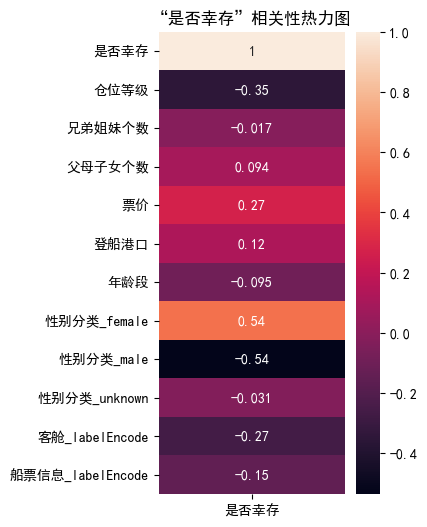

In [40]:
plt.figure(figsize=(3,6))
sns.heatmap(data_clean.corr().loc[:,['是否幸存']], annot=True)
plt.title('“是否幸存”相关性热力图')
plt.show()

6.3 使用sklearn.ensemble的RandomForestClassifier模块输出使用随机森林模型求出的特征重要性

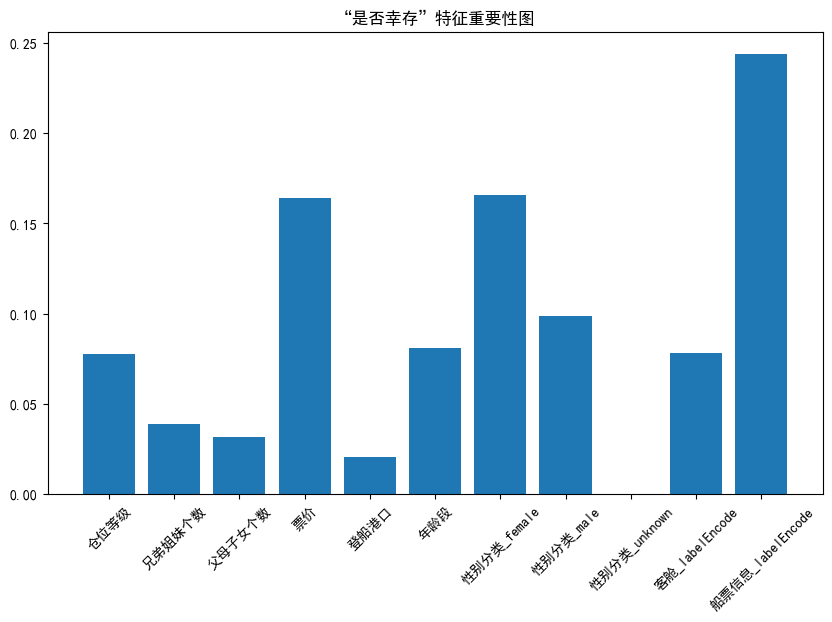

In [41]:
rf = RandomForestClassifier()
rf.fit(data_clean.iloc[:,1:],data_clean.iloc[:,0])
plt.figure(figsize=(10, 6))
plt.bar(data_clean.columns[1:],rf.feature_importances_)
plt.xticks(data_clean.columns[1:],rotation=45)
plt.title('“是否幸存”特征重要性图')
plt.show()

### 步骤 7: 保存完成特征处理的数据

In [42]:
data_clean.to_csv('data_FE.csv',index=False)